In [1]:
#loading datasets
import xarray as xr
import pickle
from scipy import stats
from scipy import *
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

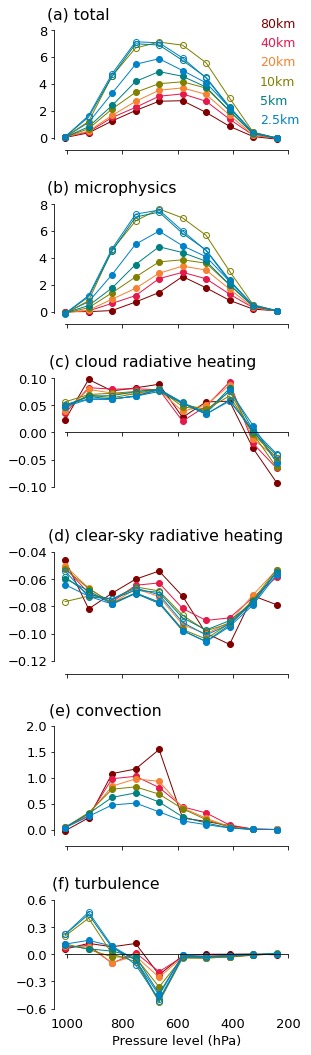

In [24]:
#defining color dictionary for plotting lines
def colordictionary():
    # manually defined colors
    mymaroon= np.array([128,   0,   0])/255
    myred   = np.array([230,  25,  75])/255
    myorange= np.array([245, 130,  48])/255
    mymagenta=np.array([240, 50, 230 ])/255
    myolive = np.array([128, 128,   0])/255
    myteal  = np.array([  0, 128, 128])/255
    myblue  = np.array([  0, 130, 200])/255
    mynavy  = np.array([  0,   0, 128])/255

    return {'80km': mymaroon, '40km': myred, '20km': myorange, '10km': myolive, '5km': myteal, '2km': myblue}
colors=colordictionary()
###########################################
#loading total diabatic heating data and its different components traced along wcb, binned over pressure level and averaged over all trajectories

#diabatic heating
with open("newcal/alltrajtot.pkl","rb") as f:
    alltrajtot = pickle.load(f)
    
#microphysics
with open("newcal/alltrajmphy.pkl","rb") as f:
    alltrajmphy = pickle.load(f)

#cloud radiative heating    
with open("newcal/alltrajhrnew.pkl","rb") as f:
    alltrajhrnew = pickle.load(f)
    
#all-sky longwave radiative heating  
with open("newcal/alltrajhrlw.pkl","rb") as f:
    alltrajhrlw = pickle.load(f)

#all-sky shortwave radiative heating 
with open("newcal/alltrajhrsw.pkl","rb") as f:
    alltrajhrsw = pickle.load(f)

#net lonwave radiative heating 
with open("newcal/alltrajhrlwnet.pkl","rb") as f:
    alltrajhrlwnet = pickle.load(f)

#net shortwave radiative heating 
with open("newcal/alltrajhrswnet.pkl","rb") as f:
    alltrajhrswnet = pickle.load(f)

#convection
with open("newcal/alltrajpcon.pkl","rb") as f:
    alltrajpcon = pickle.load(f)

#turbulence
with open("newcal/alltrajturb.pkl","rb") as f:
    alltrajturb = pickle.load(f)
    
######################################################

fig=plt.figure(figsize=(4,18))
plt.rcParams.update({'font.size': 13})
plt.subplots_adjust(hspace = 0.6)

ax = fig.add_subplot(611)
ax.plot(alltrajtot[0][0], alltrajtot[0][1], linewidth=1, marker='o', label='80km', color=colors['80km'],clip_on=False)
ax.plot(alltrajtot[1][0], alltrajtot[1][1], linewidth=1, marker='o', label='40km', color=colors['40km'],clip_on=False)
ax.plot(alltrajtot[2][0], alltrajtot[2][1], linewidth=1, marker='o', label='20km', color=colors['20km'],clip_on=False)
ax.plot(alltrajtot[3][0], alltrajtot[3][1], linewidth=1, marker='o', label='10km', color=colors['10km'],clip_on=False)
ax.plot(alltrajtot[4][0], alltrajtot[4][1], linewidth=1, marker='o', label='5km', color=colors['5km'],clip_on=False)
ax.plot(alltrajtot[5][0], alltrajtot[5][1], linewidth=1, marker='o', label='2.5km', color=colors['2km'],clip_on=False)
ax.plot(alltrajtot[6][0], alltrajtot[6][1], linewidth=1, marker='o', markerfacecolor='None', color=colors['10km'],clip_on=False)
ax.plot(alltrajtot[7][0], alltrajtot[7][1], linewidth=1, marker='o', markerfacecolor='None', color=colors['5km'],clip_on=False)
ax.plot(alltrajtot[8][0], alltrajtot[8][1], linewidth=1, marker='o', markerfacecolor='None', color=colors['2km'],clip_on=False)
leg = plt.legend(loc='lower right', bbox_to_anchor=(1.1,0.01), fontsize=12.5, handlelength=0, markerscale=0, frameon=False)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.tick_params(axis="x", pad=15)
ax.axes.xaxis.set_ticklabels([])
plt.xlim(200,1007.5)
plt.gca().invert_xaxis()
yticks=[0,2,4,6,8]
ax.set_yticks(yticks)
plt.ylim(-0.1,8)
plt.title('(a) total',x=0.06, y=1.05)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.1))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')



ax = fig.add_subplot(612)
ax.plot(alltrajmphy[0][0], alltrajmphy[0][1], linewidth=1, marker='o', label='80km', color=colors['80km'],clip_on=False)
ax.plot(alltrajmphy[1][0], alltrajmphy[1][1], linewidth=1, marker='o', label='40km', color=colors['40km'],clip_on=False)
ax.plot(alltrajmphy[2][0], alltrajmphy[2][1], linewidth=1, marker='o', label='20km', color=colors['20km'],clip_on=False)
ax.plot(alltrajmphy[3][0], alltrajmphy[3][1], linewidth=1, marker='o', label='10km', color=colors['10km'],clip_on=False)
ax.plot(alltrajmphy[4][0], alltrajmphy[4][1], linewidth=1, marker='o', label='5km', color=colors['5km'],clip_on=False)
ax.plot(alltrajmphy[5][0], alltrajmphy[5][1], linewidth=1, marker='o', label='2.5km', color=colors['2km'],clip_on=False)
ax.plot(alltrajmphy[6][0], alltrajmphy[6][1], linewidth=1, marker='o', markerfacecolor='None', color=colors['10km'],clip_on=False)
ax.plot(alltrajmphy[7][0], alltrajmphy[7][1], linewidth=1, marker='o', markerfacecolor='None', color=colors['5km'],clip_on=False)
ax.plot(alltrajmphy[8][0], alltrajmphy[8][1], linewidth=1, marker='o', markerfacecolor='None', color=colors['2km'],clip_on=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.tick_params(axis="x", pad=15)
ax.axes.xaxis.set_ticklabels([])
plt.xlim(200,1007.5)
plt.gca().invert_xaxis()
yticks=[0,2,4,6,8]
ax.set_yticks(yticks)
plt.ylim(-0.1,8)
plt.title('(b) microphysics',x=0.21, y=1.05)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.1))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')


ax=fig.add_subplot(613)
ax.plot(alltrajhrnew[0][0], alltrajhrnew[0][1]/24, linewidth=1, marker='o', label='80km', color=colors['80km'],clip_on=False)
ax.plot(alltrajhrnew[1][0], alltrajhrnew[1][1]/24, linewidth=1, marker='o', label='40km', color=colors['40km'],clip_on=False)
ax.plot(alltrajhrnew[2][0], alltrajhrnew[2][1]/24, linewidth=1, marker='o', label='20km', color=colors['20km'],clip_on=False)
ax.plot(alltrajhrnew[3][0], alltrajhrnew[3][1]/24, linewidth=1, marker='o', label='10km', color=colors['10km'],clip_on=False)
ax.plot(alltrajhrnew[4][0], alltrajhrnew[4][1]/24, linewidth=1, marker='o', label='5km', color=colors['5km'],clip_on=False)
ax.plot(alltrajhrnew[5][0], alltrajhrnew[5][1]/24, linewidth=1, marker='o', label='2.5km', color=colors['2km'],clip_on=False)
ax.plot(alltrajhrnew[6][0], alltrajhrnew[6][1]/24, linewidth=1, marker='o', markerfacecolor='None', color=colors['10km'],clip_on=False)
ax.plot(alltrajhrnew[7][0], alltrajhrnew[7][1]/24, linewidth=1, marker='o', markerfacecolor='None', color=colors['5km'],clip_on=False)
ax.plot(alltrajhrnew[8][0], alltrajhrnew[8][1]/24, linewidth=1, marker='o', markerfacecolor='None', color=colors['2km'],clip_on=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('zero'))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')
ax.axes.xaxis.set_ticklabels([])
plt.xlim(200,1007.5)
plt.gca().invert_xaxis()

plt.ylim(-0.1,0.1)

plt.title('(c) cloud radiative heating',x=0.39, y=1.05)



alltrajhrnet_clearsky=[((alltrajhrlw[0][1]-alltrajhrlwnet[0][1])+(alltrajhrsw[0][1]-alltrajhrswnet[0][1])),((alltrajhrlw[1][1]-alltrajhrlwnet[1][1])+(alltrajhrsw[1][1]-alltrajhrswnet[1][1])),((alltrajhrlw[2][1]-alltrajhrlwnet[2][1])+(alltrajhrsw[2][1]-alltrajhrswnet[2][1])),((alltrajhrlw[3][1]-alltrajhrlwnet[3][1])+(alltrajhrsw[3][1]-alltrajhrswnet[3][1])),((alltrajhrlw[4][1]-alltrajhrlwnet[4][1])+(alltrajhrsw[4][1]-alltrajhrswnet[4][1])),((alltrajhrlw[5][1]-alltrajhrlwnet[5][1])+(alltrajhrsw[5][1]-alltrajhrswnet[5][1])),((alltrajhrlw[6][1]-alltrajhrlwnet[6][1])+(alltrajhrsw[6][1]-alltrajhrswnet[6][1])),((alltrajhrlw[7][1]-alltrajhrlwnet[7][1])+(alltrajhrsw[7][1]-alltrajhrswnet[7][1])),((alltrajhrlw[8][1]-alltrajhrlwnet[8][1])+(alltrajhrsw[8][1]-alltrajhrswnet[8][1]))]
ax=fig.add_subplot(614)
ax.plot(alltrajhrlw[0][0], alltrajhrnet_clearsky[0]/24, linewidth=1, marker='o', label='80km', color=colors['80km'],clip_on=False)
ax.plot(alltrajhrlw[1][0], alltrajhrnet_clearsky[1]/24, linewidth=1, marker='o', label='40km', color=colors['40km'],clip_on=False)
ax.plot(alltrajhrlw[2][0], alltrajhrnet_clearsky[2]/24, linewidth=1, marker='o', label='20km', color=colors['20km'],clip_on=False)
ax.plot(alltrajhrlw[3][0], alltrajhrnet_clearsky[3]/24, linewidth=1, marker='o', label='10km', color=colors['10km'],clip_on=False)
ax.plot(alltrajhrlw[4][0], alltrajhrnet_clearsky[4]/24, linewidth=1, marker='o', label='5km', color=colors['5km'],clip_on=False)
ax.plot(alltrajhrlw[5][0], alltrajhrnet_clearsky[5]/24, linewidth=1, marker='o', label='2.5km', color=colors['2km'],clip_on=False)
ax.plot(alltrajhrlw[6][0], alltrajhrnet_clearsky[6]/24, linewidth=1, marker='o', markerfacecolor='None', color=colors['10km'],clip_on=False)
ax.plot(alltrajhrlw[7][0], alltrajhrnet_clearsky[7]/24, linewidth=1, marker='o', markerfacecolor='None', color=colors['5km'],clip_on=False)
ax.plot(alltrajhrlw[8][0], alltrajhrnet_clearsky[8]/24, linewidth=1, marker='o', markerfacecolor='None', color=colors['2km'],clip_on=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.12))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')
ax.axes.xaxis.set_ticklabels([])
plt.xlim(200,1007.5)
plt.gca().invert_xaxis()
plt.ylim(-0.12,-0.04)
plt.title('(d) clear-sky radiative heating',x=0.45, y=1.05)


ax=fig.add_subplot(615)
ax.plot(alltrajpcon[0][0], alltrajpcon[0][1], linewidth=1, marker='o', label='80km', color=colors['80km'],clip_on=False)
ax.plot(alltrajpcon[1][0], alltrajpcon[1][1], linewidth=1, marker='o', label='40km', color=colors['40km'],clip_on=False)
ax.plot(alltrajpcon[2][0], alltrajpcon[2][1], linewidth=1, marker='o', label='20km', color=colors['20km'],clip_on=False)
ax.plot(alltrajpcon[3][0], alltrajpcon[3][1], linewidth=1, marker='o', label='10km', color=colors['10km'],clip_on=False)
ax.plot(alltrajpcon[4][0], alltrajpcon[4][1], linewidth=1, marker='o', label='5km', color=colors['5km'],clip_on=False)
ax.plot(alltrajpcon[5][0], alltrajpcon[5][1], linewidth=1, marker='o', label='2.5km', color=colors['2km'],clip_on=False)

    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.axes.xaxis.set_ticklabels([])
plt.xlim(200,1007.5)
plt.gca().invert_xaxis()
yticks=[0,0.5,1,1.5,2]
ax.set_yticks(yticks)
plt.ylim(-0.1,2)

plt.title('(e) convection',x=0.18, y=1.05)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.1))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')

ax=fig.add_subplot(616)
ax.plot(alltrajturb[0][0], alltrajturb[0][1], linewidth=1, marker='o', label='80km', color=colors['80km'],clip_on=False)
ax.plot(alltrajturb[1][0], alltrajturb[1][1], linewidth=1, marker='o', label='40km', color=colors['40km'],clip_on=False)
ax.plot(alltrajturb[2][0], alltrajturb[2][1], linewidth=1, marker='o', label='20km', color=colors['20km'],clip_on=False)
ax.plot(alltrajturb[3][0], alltrajturb[3][1], linewidth=1, marker='o', label='10km', color=colors['10km'],clip_on=False)
ax.plot(alltrajturb[4][0], alltrajturb[4][1], linewidth=1, marker='o', label='5km', color=colors['5km'],clip_on=False)
ax.plot(alltrajturb[5][0], alltrajturb[5][1], linewidth=1, marker='o', label='2.5km', color=colors['2km'],clip_on=False)
ax.plot(alltrajturb[6][0], alltrajturb[6][1], linewidth=1, marker='o', markerfacecolor='None', color=colors['10km'],clip_on=False)
ax.plot(alltrajturb[7][0], alltrajturb[7][1], linewidth=1, marker='o', markerfacecolor='None', color=colors['5km'],clip_on=False)
ax.plot(alltrajturb[8][0], alltrajturb[8][1], linewidth=1, marker='o', markerfacecolor='None', color=colors['2km'],clip_on=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.1))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')
ax.spines['bottom'].set_position('zero')
ax.tick_params(axis="x", pad=60)
plt.xlim(200,1007.5)
plt.gca().invert_xaxis()
yticks=[-0.6,-0.3,0,0.3,0.6]
ax.set_yticks(yticks)
plt.ylim(-0.6,0.6)
plt.xlabel("Pressure level (hPa)")
plt.title('(f) turbulence',x=0.18, y=1.05)